In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.impute import SimpleImputer

In [3]:
train_data=pd.read_csv('Desktop/ml_dataset/train.csv')
test_data=pd.read_csv('Desktop/ml_dataset/test.csv')
combine=[train_data,test_data]

In [4]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [5]:
train_data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [7]:
cat_var=['Gender','Relationship_Status','Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits']

In [8]:
num_var=['Age','Education_Level','Time_of_service','Time_since_promotion','growth_rate','Travel_Rate','Post_Level','Pay_Scale','Work_Life_balance','VAR1','VAR2','VAR3','VAR4','VAR5','VAR6','VAR7']

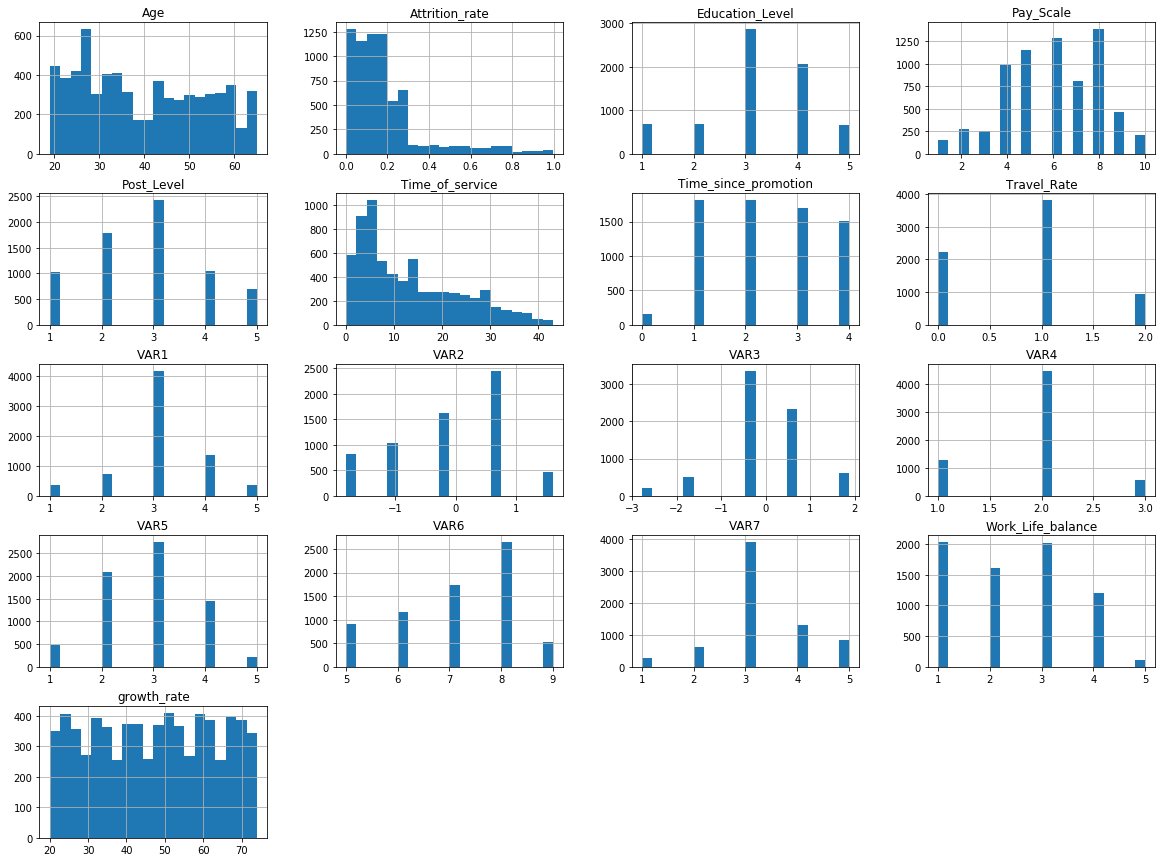

In [9]:
num_bins = 20
train_data.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [10]:
train_numeric_data=train_data[num_var]
train_numeric_data['Attrition_rate']=train_data['Attrition_rate']
test_numeric_data=test_data[num_var]

C:\Users\Sagar\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
train_cat_data=train_data[cat_var]
test_cat_data=test_data[cat_var]

In [12]:
# for dataset in combine:
#      dataset['Time_of_service']=np.where(dataset['Time_of_service'].isnull(),0,1)

In [13]:
for dataset in combine:
    dataset['edu/age']=dataset['Education_Level']/dataset['Age']

In [14]:
# for dataset in combine:
#     dataset['tos*top']=dataset['Time_of_service']*dataset['Time_since_promotion']

In [15]:
for dataset in combine:
    dataset['tos/gr']=dataset['Time_of_service']/dataset['growth_rate']

In [16]:
# for dataset in combine:
#     dataset['tos/gr']=dataset['Time_of_service']/dataset['growth_rate']

In [17]:
for dataset in combine:
    dataset.drop(columns=['Decision_skill_possess','Hometown','Relationship_Status'], inplace= True)

In [18]:
test_data=pd.get_dummies(test_data, columns=['Unit','Gender','Compensation_and_Benefits'])

In [19]:
train_data=pd.get_dummies(train_data, columns=['Unit','Gender','Compensation_and_Benefits'])

In [20]:
X_test = test_data.loc[:,test_data.columns!='Employee_ID']
X_test

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_R&D,Unit_Sales,Unit_Security,Gender_F,Gender_M,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,...,1,0,0,1,0,0,0,1,0,0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,...,0,0,0,0,1,0,0,1,0,0
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,...,0,1,0,0,1,0,0,0,1,0
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,...,0,0,0,0,1,1,0,0,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,32.0,3,3.0,3,38,1,3,6.0,2.0,1,...,0,1,0,1,0,0,0,1,0,0
2996,NaN,2,10.0,2,57,1,4,9.0,1.0,3,...,0,0,0,1,0,0,0,1,0,0
2997,60.0,4,35.0,1,69,0,2,9.0,3.0,3,...,0,0,0,1,0,0,0,0,1,0
2998,51.0,1,23.0,1,30,0,2,6.0,1.0,5,...,0,0,0,1,0,0,0,0,1,0


In [21]:
X_train = train_data.loc[:,train_data.columns!='Employee_ID']
X_train = X_train.loc[:,X_train.columns!='Attrition_rate']
y_train = train_data['Attrition_rate']
X_train.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_R&D,Unit_Sales,Unit_Security,Gender_F,Gender_M,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,1,0,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,0,0,0,1,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,0,0,0,1,0,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,0,0,0,1,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,1,0,0,0,0,1,0


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(X_train)
new_train_x= pd.DataFrame(imp.transform(X_train))
new_train_x.columns=X_train.columns
X_train=new_train_x

C:\Users\Sagar\anaconda\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(X_test)
new_test_x = pd.DataFrame(imp.transform(X_test))
new_test_x.columns=X_test.columns
X_test=new_test_x

C:\Users\Sagar\anaconda\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [24]:
# # ## Imputing missing values

# imputer = SimpleImputer()
# new_train_X = pd.DataFrame(imputer.fit_transform(X_train))
# new_test_X = pd.DataFrame(imputer.transform(X_test))

# ## Adding columns

# new_train_X.columns = X_train.columns

# new_test_X.columns = X_train.columns
# X_train = new_train_X
# X_test = new_test_X

In [25]:
#for dataset in combine:
#dataset.fillna(999,inplace=True)
# X_train.fillna(-1,inplace=True)
# X_test.fillna(-1,inplace=True)

In [26]:
# X_train.drop(columns=['Unit_Accounting and Finance','Compensation_and_Benefits_type1','Gender_F'], axis=1, inplace=True)
# X_test.drop(columns=['Unit_Accounting and Finance','Compensation_and_Benefits_type1','Gender_F'], axis=1, inplace=True)

In [27]:
X_train['tos/ps']=X_train['Time_of_service']/X_train['Pay_Scale']
X_test['tos/ps']=X_test['Time_of_service']/X_test['Pay_Scale']

In [28]:
X_train['v2/v4']=1/(X_train['VAR2']*X_train['VAR4'])
X_test['v2/v4']=1/(X_test['VAR2']*X_test['VAR4'])

In [29]:
# X_train['v1/v7']=X_train['VAR1']/X_train['VAR7']
# X_test['v1/v7']=X_test['VAR1']/X_test['VAR7']

In [30]:
# X_train['tos/pl']=X_train['Time_of_service']/X_train['Post_Level']
# X_test['tos/pl']=X_test['Time_of_service']/X_test['Post_Level']

In [31]:
total = X_test.isnull().sum().sort_values(ascending=False)
total

v2/v4                              0
VAR1                               0
edu/age                            0
VAR7                               0
VAR6                               0
VAR5                               0
VAR4                               0
VAR3                               0
VAR2                               0
Work_Life_balance                  0
Unit_Accounting and Finance        0
Pay_Scale                          0
Post_Level                         0
Travel_Rate                        0
growth_rate                        0
Time_since_promotion               0
Time_of_service                    0
Education_Level                    0
tos/gr                             0
Unit_Human Resource Management     0
tos/ps                             0
Unit_Security                      0
Compensation_and_Benefits_type4    0
Compensation_and_Benefits_type3    0
Compensation_and_Benefits_type2    0
Compensation_and_Benefits_type1    0
Compensation_and_Benefits_type0    0
G

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [33]:
y_pred=gbm_model.predict(X_test)

In [34]:
output = pd.DataFrame(data={'Employee_ID':test_data['Employee_ID'], 'Attrition_rate':y_pred})
output.to_csv('Desktop\ML_HR_29.csv', index=False, sep=',')

In [35]:
Importance = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, "Variables' Importance Level")

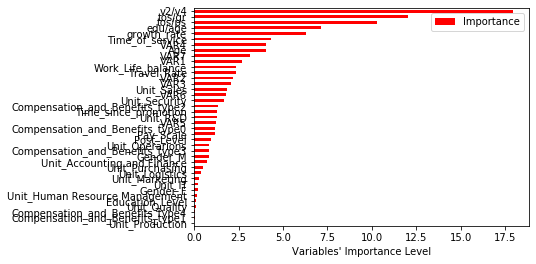

In [36]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")
plt.rcParams["figure.figsize"] = [15,15]
plt.xlabel("Variables' Importance Level")

In [37]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8],
    'n_estimators': [100,200, 500, 1000],
    'subsample': [1,0.5,0.75],
}

In [38]:
gbm= GradientBoostingRegressor()
gbm_cv_model= GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=2)  #verbose gives us some information 
gbm_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 56.3min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 500, 1000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [39]:
gbm_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [ ]:
gbm_tuned_model= GradientBoostingRegressor(learning_rate= 0.001,
                                           max_depth=3,
                                           n_estimators=500, subsample=1)
gbm_tuned_model.fit(X_train,y_train)
y_pred=gbm_tuned_model.predict(X_test)

In [ ]:
output = pd.DataFrame(data={'Employee_ID':test_data['Employee_ID'], 'Attrition_rate':y_pred})
output.to_csv('Desktop\ML_HR_30.csv', index=False, sep=',')

In [ ]:
poly = PolynomialFeatures()
Modified_X_train = poly.fit_transform(X_train)
Modified_X_test = poly.fit_transform(X_test)
les = Lasso (alpha=0.12,max_iter=3000)
les.fit(Modified_X_train,y_train)
y_pred=les.predict(Modified_X_test)

In [ ]:
output = pd.DataFrame(data={'Employee_ID':test_data['Employee_ID'], 'Attrition_rate':y_pred})
output.to_csv('Desktop\ML_HR_31.csv', index=False, sep=',')